In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

In [23]:
d = pd.read_csv("Data/reedfrogs.csv", sep=";")
print(d.shape)
d.head(8)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9


## Medium

### 13M1

In [38]:
# make the tank cluster variable
n_tanks = d.shape[0]
tank = np.arange(n_tanks)

# make the predator cluster variable
n_pred = len(np.unique(d.pred))
pred = (d.pred == "pred").astype(int).values

# make the size cluster variable
n_size = len(np.unique(d['size']))
tank_size = (d['size'] == "big").astype(int).values

In [42]:
with pm.Model() as m_13_M1:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=n_tanks)
    b = pm.Normal("b", 0.0, sigma_b, shape=n_pred)
    g = pm.Normal("g", 0.0, sigma_g, shape=n_size)
    p = pm.math.invlogit(a[tank] + b[pred] + g[tank_size])

    S = pm.Binomial("S", n=np.array(d.density), p=p, observed=d.surv)
    trace_13_M1 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_M1 = az.from_pymc3(trace_13_M1)

<ipython-input-42-7e02f4ddbabe>:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_13_M1 = pm.sample(random_seed=RANDOM_SEED)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/kwilliams/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/aesara/graph/fg.py:525: UserWarning: Variable Elemwise{mul,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
/Users/kwilliams/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/aesara/graph/fg.py:525: UserWarning: Variable Elemwise{add,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, b, a, sigma_g, sigma_b, sigma_a, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8889725613892655, but should be close to 0.8. Try to increase the number of tuning steps.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [44]:
az.summary(idata_13_M1, round_to=2)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.79,0.90,-0.56,2.39,0.11,0.08,73.65,147.85,1.04
a[0],0.76,1.12,-1.00,2.59,0.11,0.08,109.95,212.50,1.03
a[1],1.19,1.11,-0.58,2.98,0.10,0.07,116.42,234.97,1.03
a[2],0.03,1.08,-1.68,1.74,0.10,0.07,111.68,272.40,1.03
a[3],1.19,1.11,-0.56,2.95,0.10,0.07,114.71,241.21,1.03
a[4],0.66,1.12,-1.11,2.45,0.11,0.08,113.69,307.84,1.03
a[5],0.66,1.11,-1.15,2.44,0.11,0.08,107.42,280.12,1.03
a[6],1.12,1.15,-0.78,2.89,0.11,0.08,114.92,290.92,1.03
a[7],0.66,1.13,-1.02,2.59,0.11,0.08,109.83,212.44,1.03
a[8],0.61,1.03,-0.99,2.29,0.11,0.07,100.82,155.30,1.03


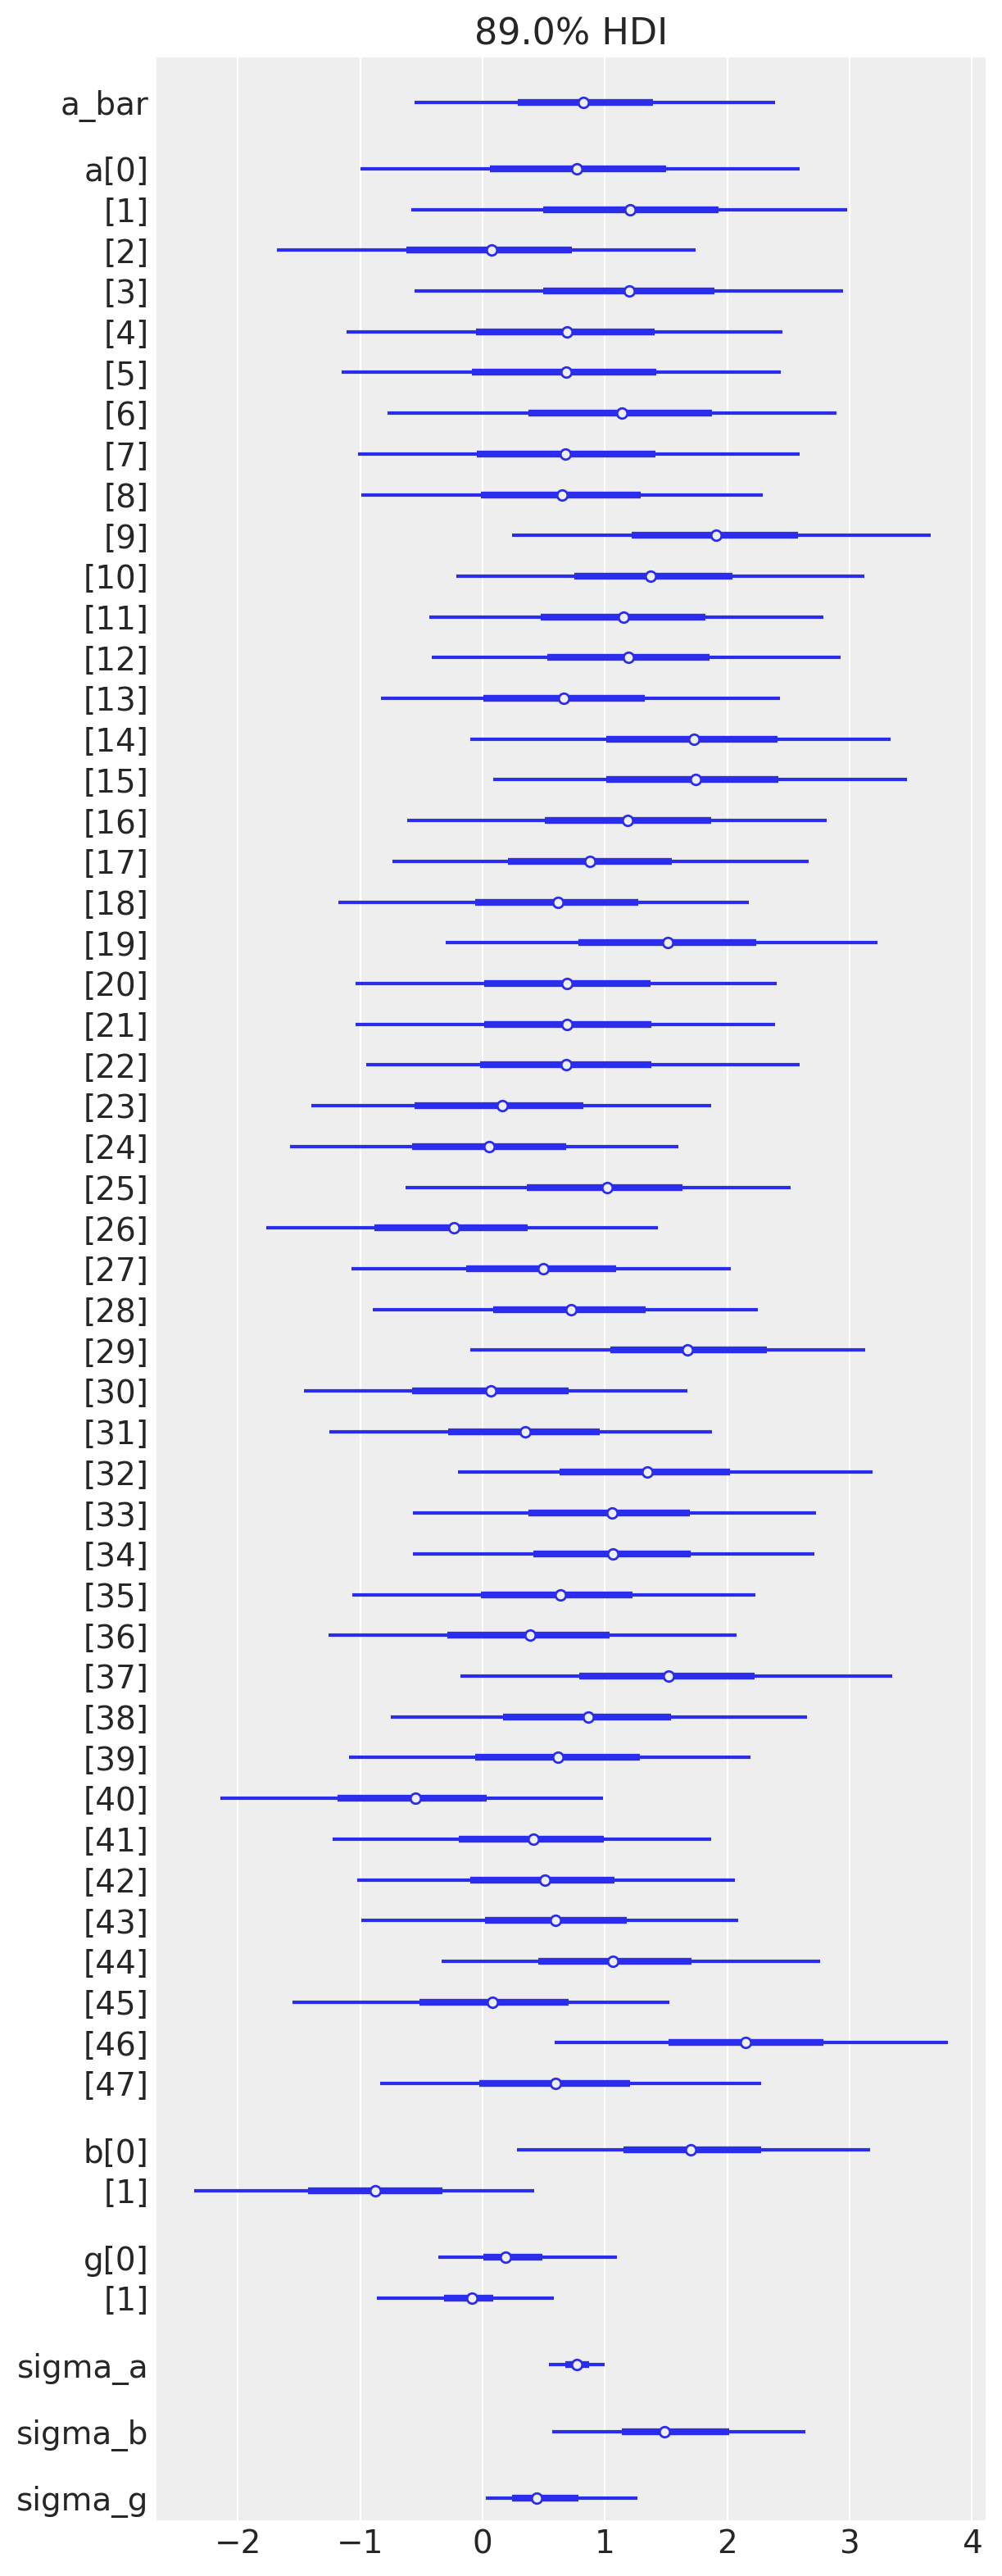

In [45]:
az.plot_forest(idata_13_M1, combined=True);

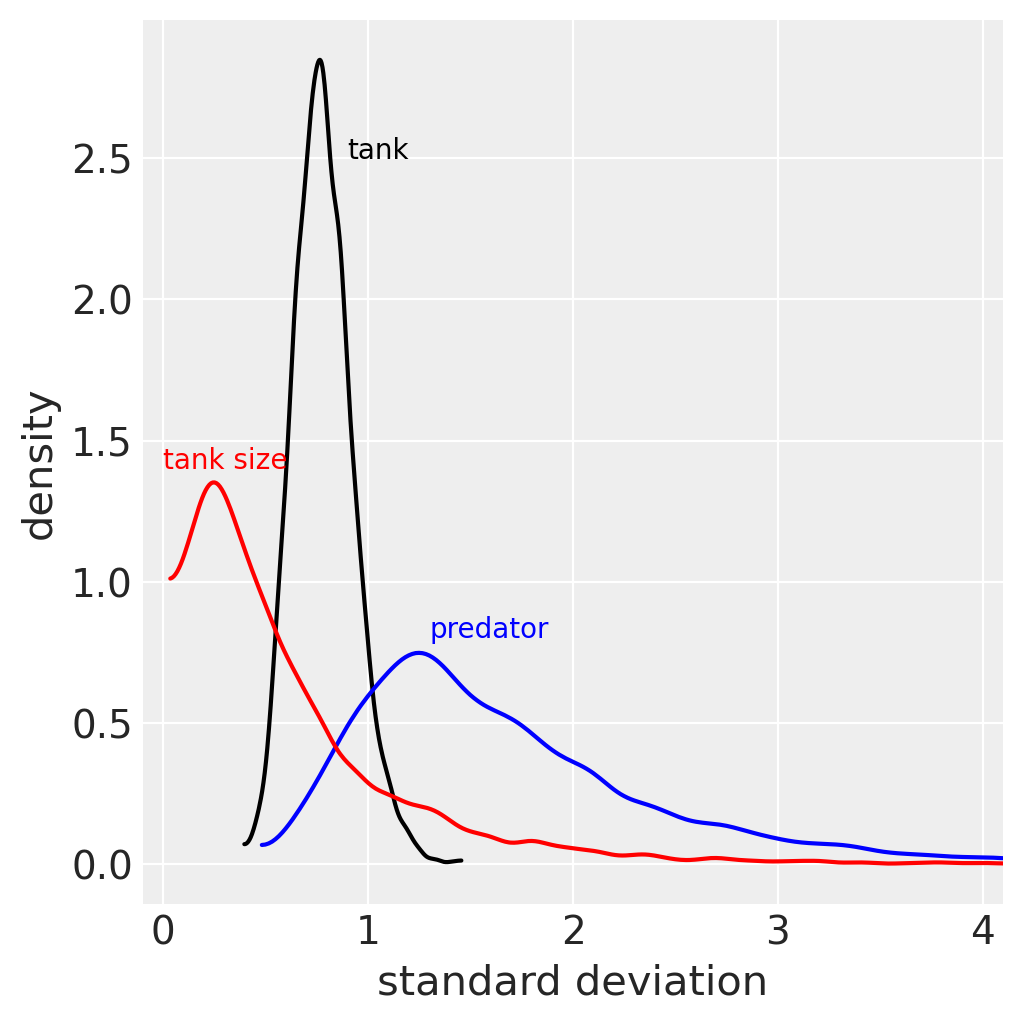

In [49]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

az.plot_kde(idata_13_M1.posterior["sigma_a"], ax=ax, plot_kwargs={"color": "black"})
az.plot_kde(idata_13_M1.posterior["sigma_b"], ax=ax, plot_kwargs={"color": "blue"})
az.plot_kde(idata_13_M1.posterior["sigma_g"], ax=ax, plot_kwargs={"color": "red"})

ax.text(0.9, 2.5, "tank", color="black")
ax.text(1.3, 0.8, "predator", color="blue")
ax.text(0, 1.4, "tank size", color = "red")
ax.set_xlabel("standard deviation")
ax.set_ylabel("density")
ax.set_xlim(-0.1, 4.1);

### 13H4

In [50]:
with pm.Model() as m_13_H1:
    # hyperpriors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    # priors
    a = pm.Normal("a", a_bar, sigma_a, shape=n_tanks)
    g = pm.Normal("g", 0.0, sigma_g, shape=n_size)
    
    # GLM
    p = pm.math.invlogit(a[tank] + g[tank_size])

    # liklihood
    S = pm.Binomial("S", n=np.array(d.density), p=p, observed=d.surv)
    
    # posterior (on p)
    trace_13_H1 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_H1 = az.from_pymc3(trace_13_H1)

<ipython-input-50-cc1e9a0fd7f3>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_13_H1 = pm.sample(random_seed=RANDOM_SEED)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/kwilliams/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/aesara/graph/fg.py:525: UserWarning: Variable Elemwise{mul,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
/Users/kwilliams/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/aesara/graph/fg.py:525: UserWarning: Variable Elemwise{add,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
There were 79 divergences after tuning. Increase `target_accept` or reparameterize.
There were 233 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6320780212729722, but should be close to 0.8. Try to increase the number of tuning steps.
There were 270 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5978037940718802, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [52]:
az.summary(idata_13_H1, round_to=2)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.19,0.55,0.55,1.97,0.05,0.03,221.15,194.47,1.03
a[0],2.01,0.92,0.62,3.46,0.05,0.03,415.27,419.14,1.07
a[1],2.88,1.14,1.11,4.59,0.08,0.06,159.29,388.17,1.03
a[2],0.95,0.83,-0.24,2.24,0.05,0.04,312.44,334.03,1.02
a[3],3.10,1.24,1.26,4.88,0.15,0.12,80.69,497.20,1.04
a[4],1.93,1.02,0.25,3.36,0.07,0.05,208.54,265.20,1.03
a[5],1.95,1.03,0.37,3.47,0.08,0.05,178.46,345.29,1.02
a[6],2.89,1.27,0.98,4.61,0.17,0.12,63.94,504.91,1.05
a[7],1.84,1.01,0.36,3.47,0.05,0.04,473.58,270.92,1.02
a[8],-0.28,0.78,-1.33,1.00,0.07,0.05,127.45,295.10,1.03


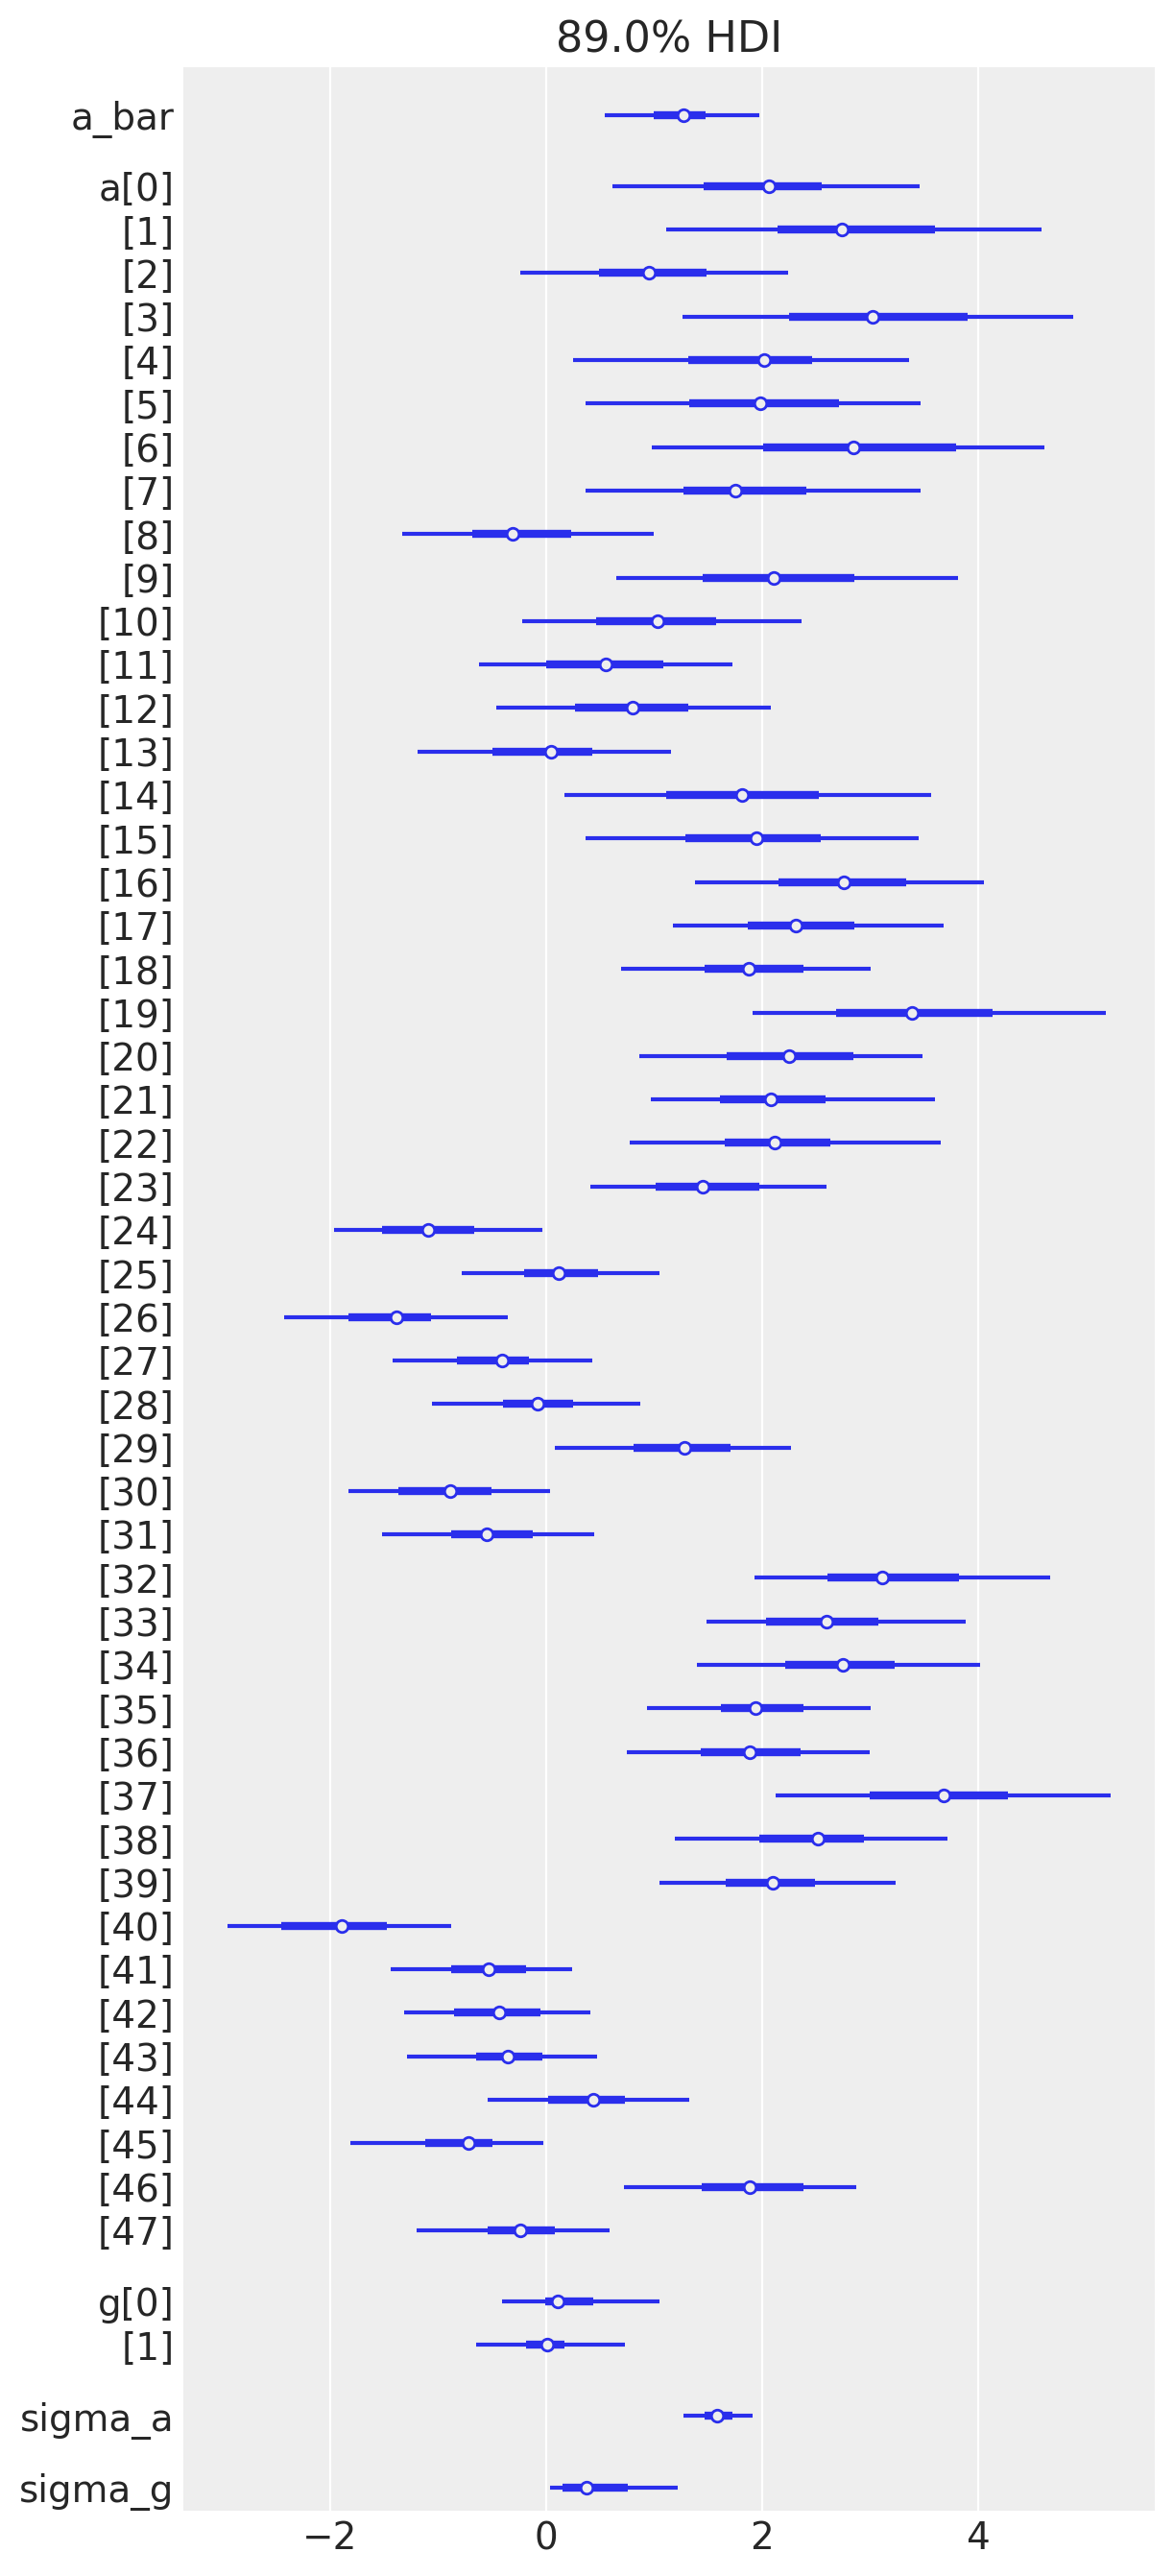

In [53]:
az.plot_forest(idata_13_H1, combined=True);

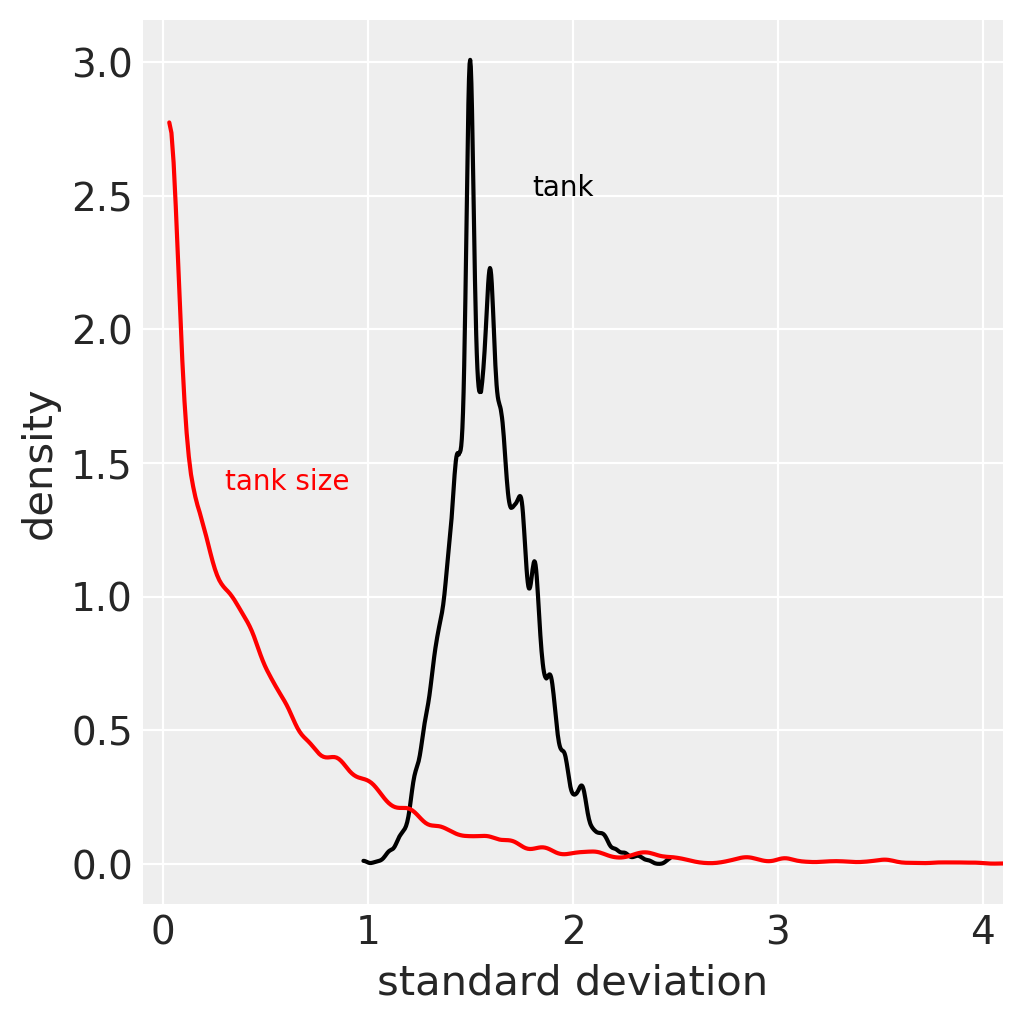

In [55]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

az.plot_kde(idata_13_H1.posterior["sigma_a"], ax=ax, plot_kwargs={"color": "black"})
az.plot_kde(idata_13_H1.posterior["sigma_g"], ax=ax, plot_kwargs={"color": "red"})

ax.text(1.8, 2.5, "tank", color="black")
ax.text(0.3, 1.4, "tank size", color = "red")
ax.set_xlabel("standard deviation")
ax.set_ylabel("density")
ax.set_xlim(-0.1, 4.1);